Coursera - Build Basic GANs - Week 1

Build First GAN
Objectives: 


1.   Build Generator and discriminator from scratch
2.   Create Generator and Discriminator loss Function
3.   Train your GAN and visualize the results





Import the required packages

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from tqdm.auto import tqdm

torch.manual_seed(0)

Function to Visualize images

In [ ]:
def show_tensor_images(image_tensor, num_images=25, size=(1,28,28)):
  image_unflat = image_tensor.detach().cpu().view(-1, *size)
  image_grid = make_grid(image_unflat[:num_images], nrows=5)
  plt.imshow(image_grid.permute(1,2,0).squeeze())
  plt.show()


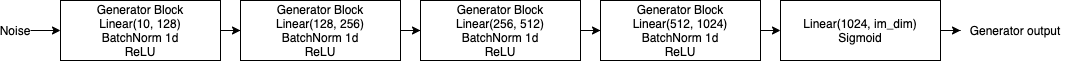

Generator

In [ ]:
def generator_block(input_dim, output_dim):
  return nn.Sequential(
      nn.Linear(input_dim, output_dim),
      nn.BatchNorm1d(output_dim),
      nn.ReLU(inplace=True),
  )

class Generator(nn.Module):
  def __init__(self, z_dim=10, im_dim=784, hidden_dim=128):
    super(Generator, self).__init__()
    self.z_dim = z_dim
    self.im_dim = im_dim
    self.hidden_dim = hidden_dim
    # Build NN
    self.gen = nn.Sequential(
        generator_block(self.z_dim, self.hidden_dim),
        generator_block(self.hidden_dim, self.hidden_dim * 2),
        generator_block(self.hidden_dim * 2, self.hidden_dim * 4),
        generator_block(self.hidden_dim * 4, self.hidden_dim * 8),
        nn.Linear(self.hidden_dim * 8, self.im_dim),
        nn.Sigmoid()
    )
  def __str__(self):
    return ('Generator with noise dim=' + str(self.z_dim) + ' Hidden dim=' + str(self.hidden_dim) + ' Image Dim =' + str(self.im_dim))

  def forward(self, noise):
    return self.gen(noise)


Generator with noise dim=10 Hidden dim=128 Image Dim =784


Generate Noise

In [ ]:
def get_noise(n_samples, z_dim, device='cpu'):
  return torch.randn(n_samples, z_dim, device=device)

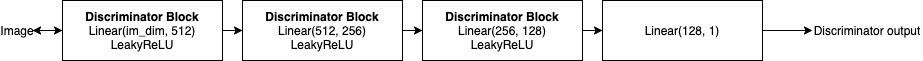Discriminator

In [ ]:
def discriminator_block(input_dim, output_dim):
  return nn.Sequential(
      nn.Linear(input_dim, output_dim),
      nn.LeakyReLU(0.2, inplace=True)
  )
class Discriminator(nn.Module):
  def __init__(self, im_dim=784, hidden_dim=128):
    super(Discriminator, self).__init__()
    self.im_dim = im_dim
    self.hidden_dim = hidden_dim
    
    self.disc = nn.Sequential(
        discriminator_block(self.im_dim, self.hidden_dim * 4),
        discriminator_block(self.hidden_dim * 4, self.hidden_dim * 2),
        discriminator_block(self.hidden_dim * 2, self.hidden_dim),
        nn.Linear(self.hidden_dim, 1)
    )

  def __str__(self):
    return ('The Discriminator with Image dim=' + str(self.im_dim) + ' Hidden Dim' + str(self.hidden_dim))

  def forward(self, image):
    return self.disc(image)

disc = Discriminator()
print(disc)

The Discriminator with Image dim=784 Hidden Dim128


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Training Details

In [ ]:
criterion = nn.BCEWithLogitsLoss()
n_epochs = 200
z_dim = 64
display_step = 500
batch_size = 128
lr = 0.00001
device = 'cuda'

# Load MNIST dataset
dataloader = DataLoader(
    MNIST('.', download=True, transform=transforms.ToTensor()),
    batch_size=batch_size,
    shuffle=True
)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
gen = Generator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
disc = Discriminator().to(device)
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

Define Disc Loss and Gen Loss

In [ ]:
def get_disc_loss(gen, disc, criterion, real, num_images, z_dim, device):
  # return disc loss : a torch scalar loss value for the current batch

  # steps
  # 1. Create noise vectors and generate a batch of fake images
  # 2. Get the discriminator's prediction of the fake image and calculate loss. Detach the Generator
  # 3. Get the discriminator's prediction of the real image and calculate loss
  # 4. Calculate the discriminator's loss by averaging the real and fake loss and set it to disc loss

  fake_noise = get_noise(num_images, z_dim, device=device)
  fake = gen(fake_noise)
  disc_fake_pred = disc(fake.detach())
  disc_fake_loss = criterion(disc_fake_pred, torch.zeros_like(disc_fake_pred))
  disc_real_pred = disc(real)
  disc_real_loss = criterion(disc_real_pred, torch.ones_like(disc_real_pred))
  disc_loss = (disc_fake_loss + disc_real_loss) / 2
  return disc_loss

def get_gen_loss(gen, disc, criterion, num_images, z_dim, device):
  # steps
  #1. create noise vectors and generate a batch of fake images
  #2. Get the discriminator's prediction of the fake image
  #3. Calculate the generator's loss

  fake_noise = get_noise(num_images, z_dim, device=device)
  fake = gen(fake_noise)
  disc_fake_pred = disc(fake)
  gen_loss = criterion(disc_fake_pred, torch.ones_like(disc_fake_pred))
  return gen_loss




Put Everything together

Step 500:Generator loss: 1.4165889705419534, discriminator loss: 0.41192527896165865


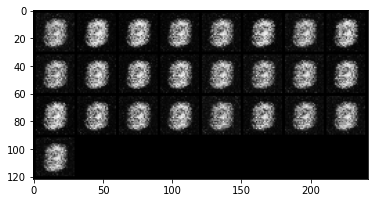

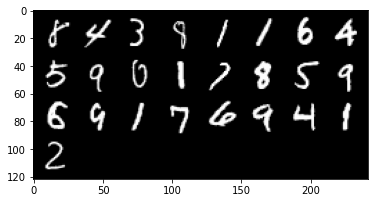

Step 1000:Generator loss: 1.7699935867786392, discriminator loss: 0.2797062149643896


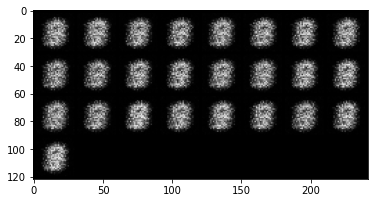

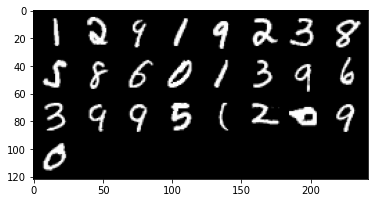

Step 1500:Generator loss: 2.0699230821132657, discriminator loss: 0.16039720781147468


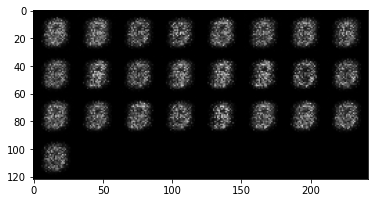

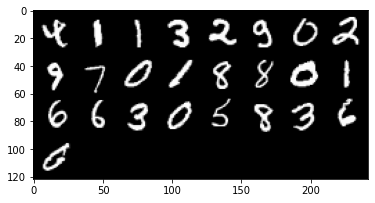

Step 2000:Generator loss: 1.7171198630332938, discriminator loss: 0.21578836816549302


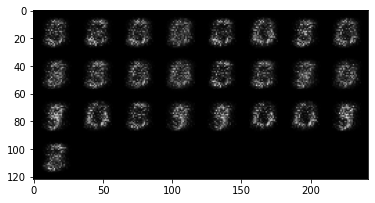

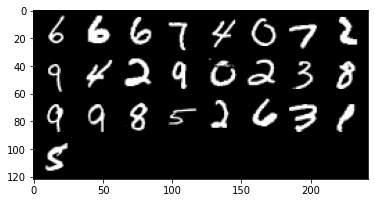

Step 2500:Generator loss: 1.6894823470115665, discriminator loss: 0.2087434681653976


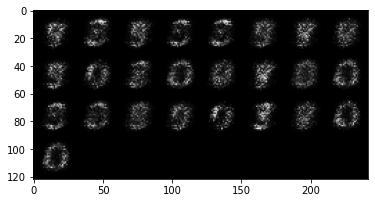

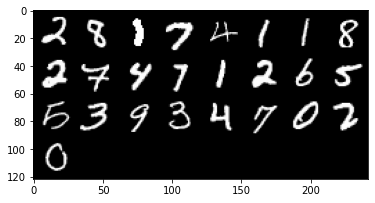

Step 3000:Generator loss: 1.9209185876846306, discriminator loss: 0.17583941654860955


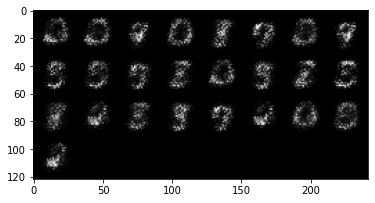

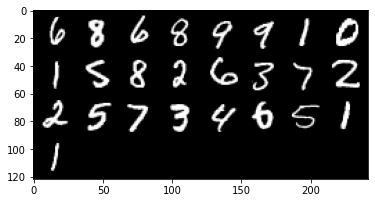

Step 3500:Generator loss: 2.326172907114029, discriminator loss: 0.1281029275804758


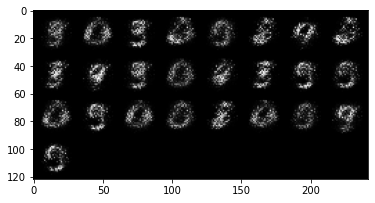

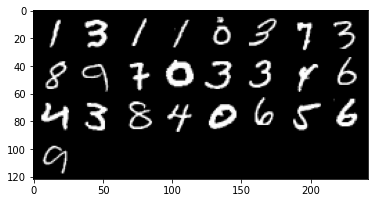

Step 4000:Generator loss: 2.7836878819465634, discriminator loss: 0.09873667746782305


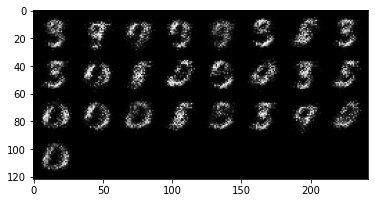

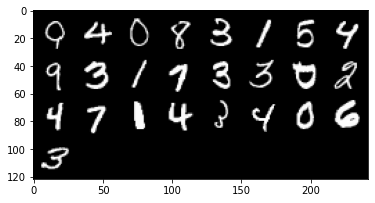

Step 4500:Generator loss: 3.0866871523857093, discriminator loss: 0.0890416197925806


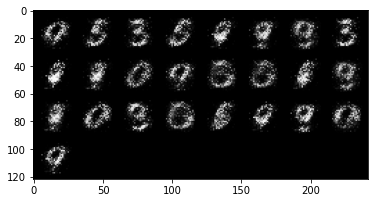

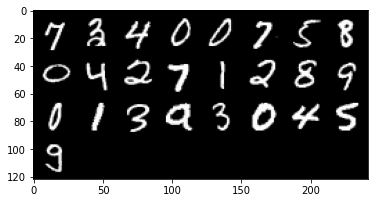

Step 5000:Generator loss: 3.4383091468811005, discriminator loss: 0.07718374854326246


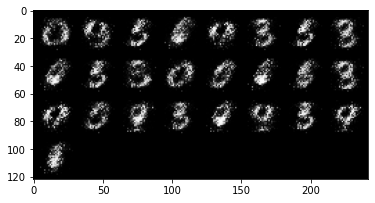

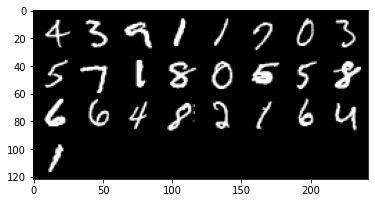

Step 5500:Generator loss: 3.6904808230400072, discriminator loss: 0.06850916287302969


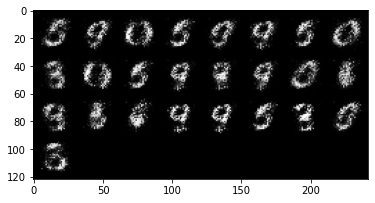

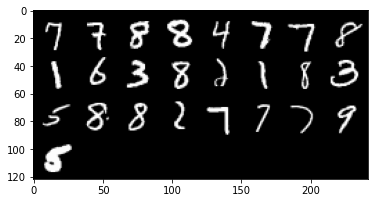

Step 6000:Generator loss: 3.907049704551702, discriminator loss: 0.05556215412542221


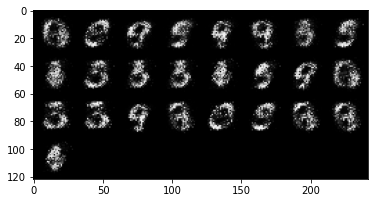

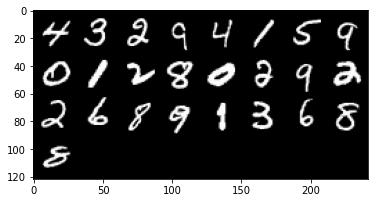

Step 6500:Generator loss: 3.901533024311063, discriminator loss: 0.053390073250979185


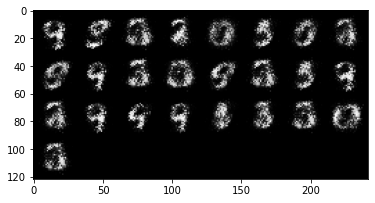

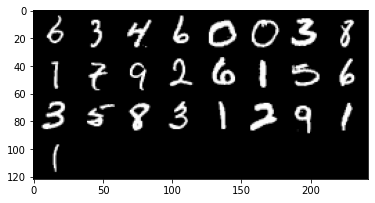

Step 7000:Generator loss: 4.013643740653991, discriminator loss: 0.06107090333104137


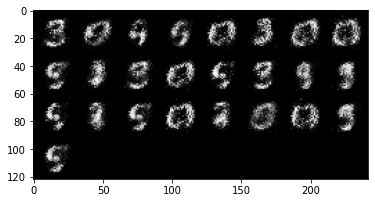

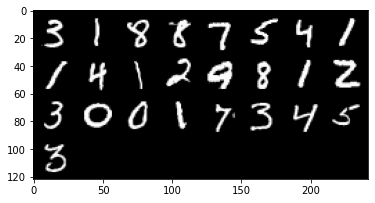

Step 7500:Generator loss: 3.9753445487022434, discriminator loss: 0.06328701101988561


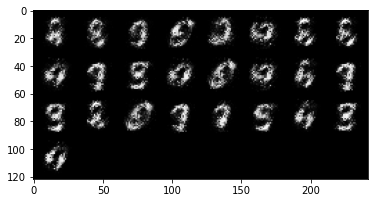

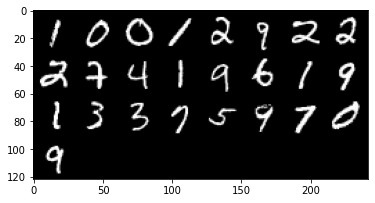

Step 8000:Generator loss: 4.038098864555361, discriminator loss: 0.05820680315047506


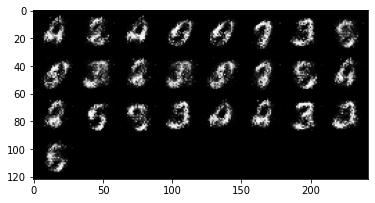

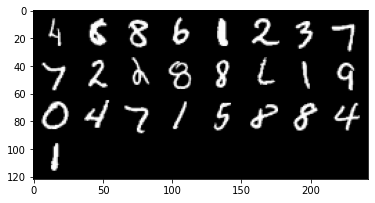

Step 8500:Generator loss: 4.117016897201536, discriminator loss: 0.05802453664317727


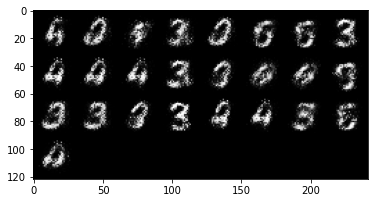

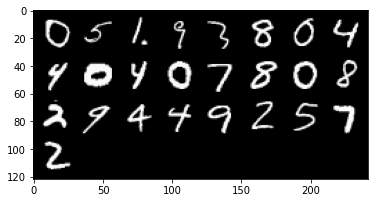

Step 9000:Generator loss: 4.1326046242713925, discriminator loss: 0.06486960379034283


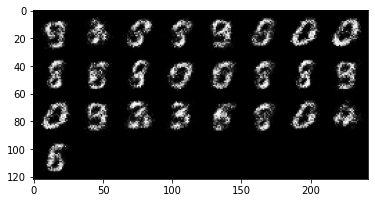

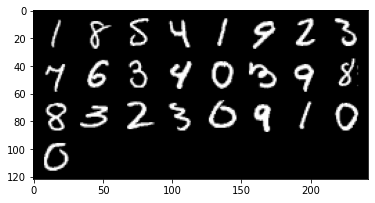

Step 9500:Generator loss: 3.979456480026247, discriminator loss: 0.06753931821137667


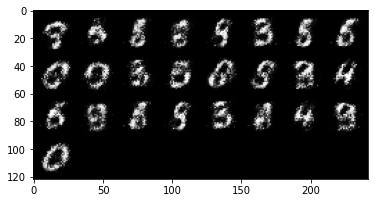

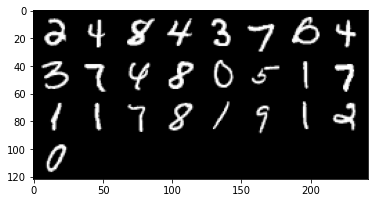

Step 10000:Generator loss: 4.035754977703094, discriminator loss: 0.07612359017133712


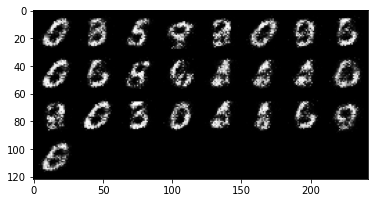

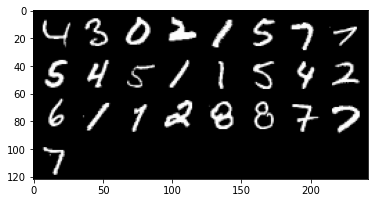

Step 10500:Generator loss: 3.840990109920503, discriminator loss: 0.07668599150329823


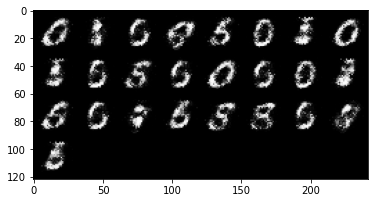

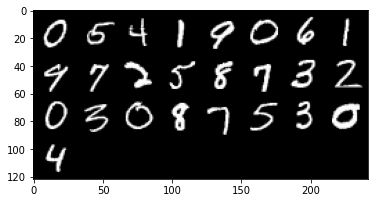

Step 11000:Generator loss: 3.821459103107453, discriminator loss: 0.0750047046765686


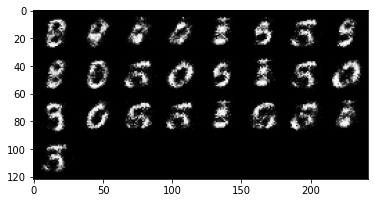

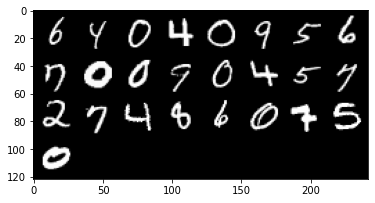

Step 11500:Generator loss: 3.832795310497283, discriminator loss: 0.07209161820262673


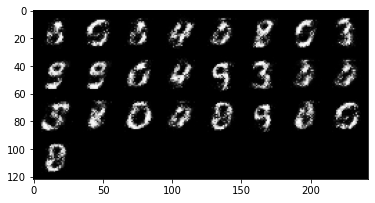

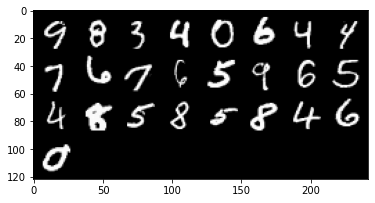

Step 12000:Generator loss: 3.83585677433014, discriminator loss: 0.07860140337795035


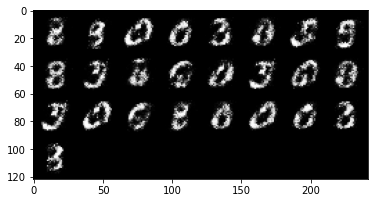

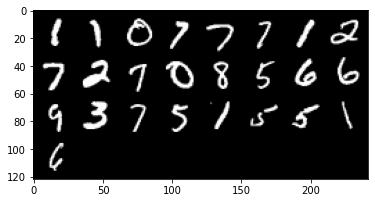

Step 12500:Generator loss: 3.7545458502769478, discriminator loss: 0.08863920965045682


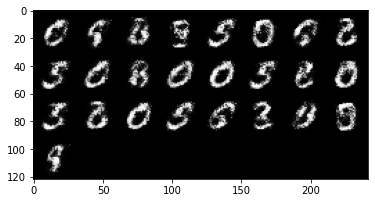

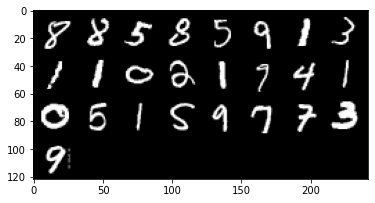

Step 13000:Generator loss: 3.7175355916023216, discriminator loss: 0.09898961350321779


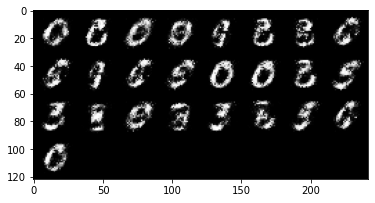

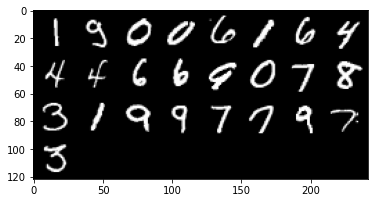

Step 13500:Generator loss: 3.7713676447868365, discriminator loss: 0.10255033332854507


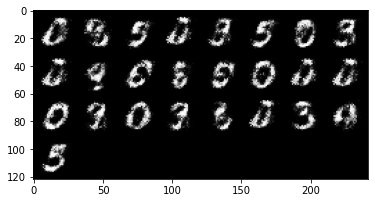

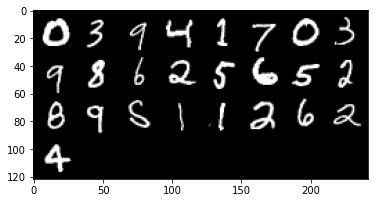

Step 14000:Generator loss: 3.7080400867462133, discriminator loss: 0.09629938825219876


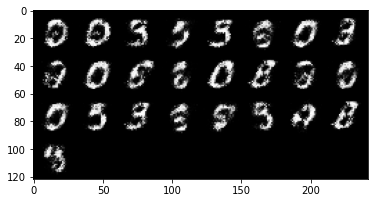

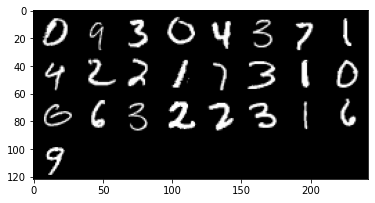

Step 14500:Generator loss: 3.707156144142152, discriminator loss: 0.09754611288756136


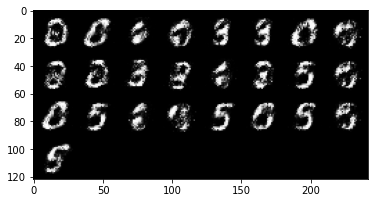

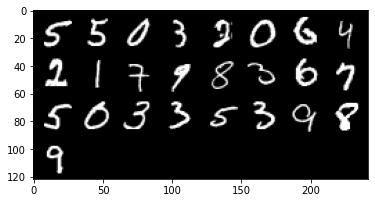

Step 15000:Generator loss: 3.5729987406730648, discriminator loss: 0.10062898097932338


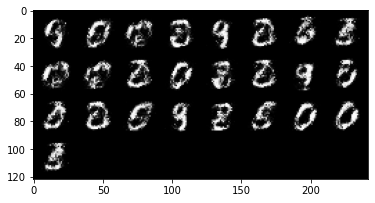

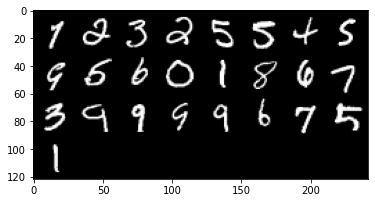

Step 15500:Generator loss: 3.490511428356173, discriminator loss: 0.1165575244501233


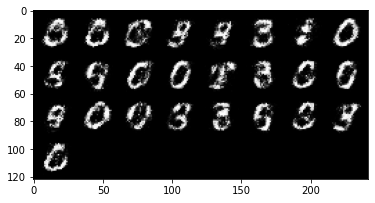

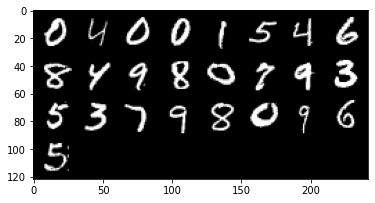

Step 16000:Generator loss: 3.661592434883117, discriminator loss: 0.11115917824208749


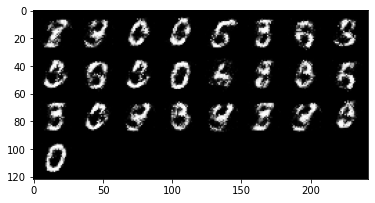

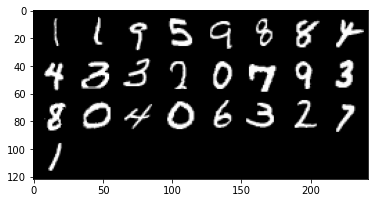

Step 16500:Generator loss: 3.3469820575714104, discriminator loss: 0.15249061220884336


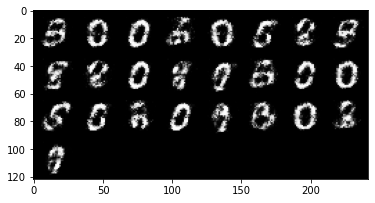

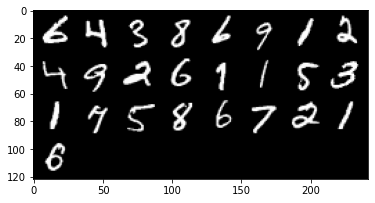

Step 17000:Generator loss: 3.287038172245023, discriminator loss: 0.14257262840867044


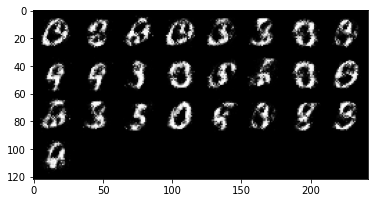

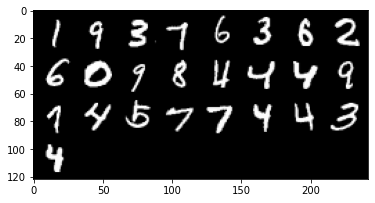

Step 17500:Generator loss: 3.2609488663673374, discriminator loss: 0.13485488121956593


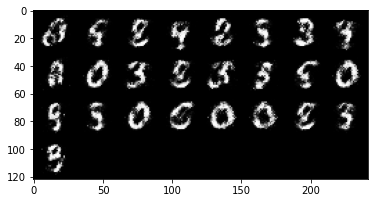

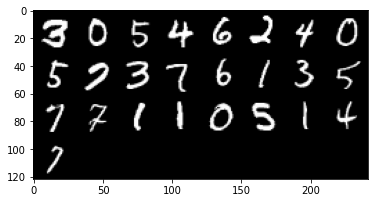

Step 18000:Generator loss: 3.3189399652481075, discriminator loss: 0.16443877142667765


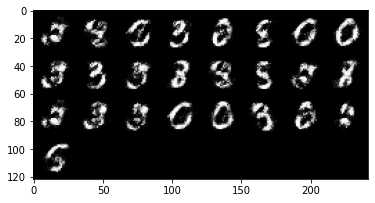

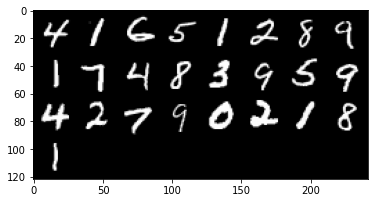

Step 18500:Generator loss: 3.242640329360964, discriminator loss: 0.17087902657687676


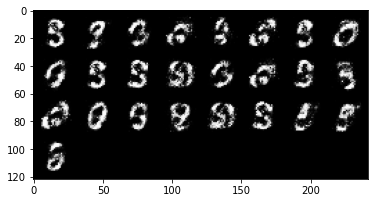

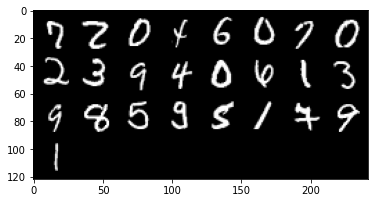

Step 19000:Generator loss: 3.238704089641574, discriminator loss: 0.15868187923729438


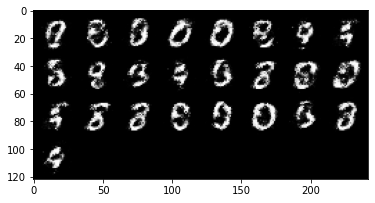

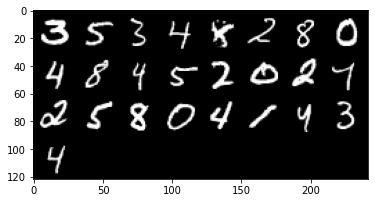

Step 19500:Generator loss: 3.0776452913284293, discriminator loss: 0.17216032502055165


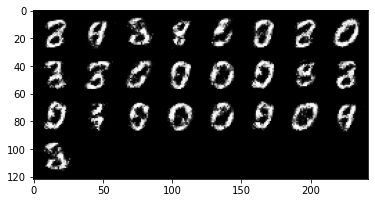

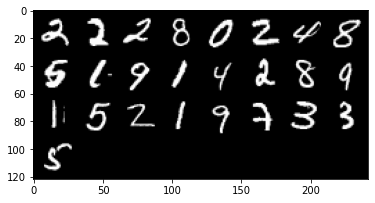

Step 20000:Generator loss: 3.010197824954986, discriminator loss: 0.1857490468025208


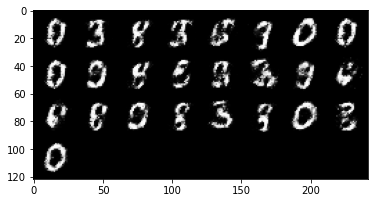

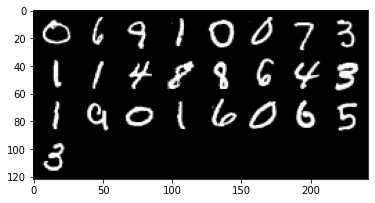

Step 20500:Generator loss: 3.0832715420722945, discriminator loss: 0.16558598582446565


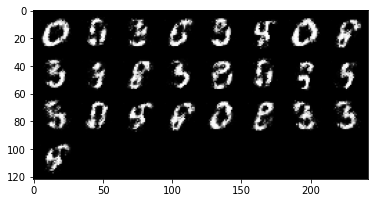

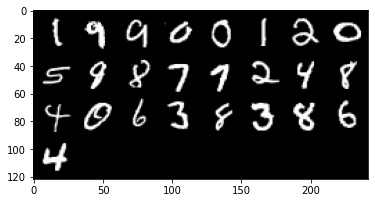

Step 21000:Generator loss: 3.0401284933090182, discriminator loss: 0.19754979720711707


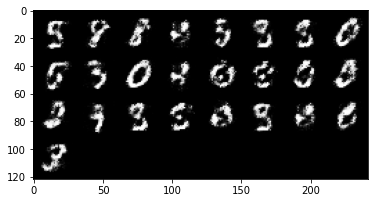

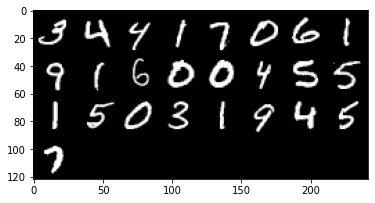

Step 21500:Generator loss: 3.0016889443397528, discriminator loss: 0.19524931037425994


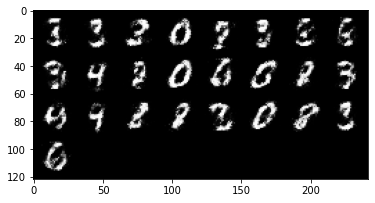

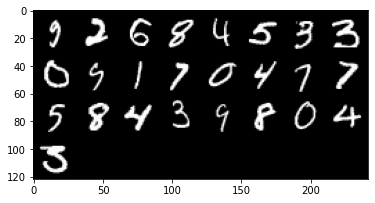

In [ ]:
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
test_generator = True
gen_loss = False
error = False

for epoch in range(n_epochs):

  # dataloader
  for real, _ in tqdm(dataloader):
    cur_batch_size = len(real)

    # Flatten the batch of real images from the dataset
    real = real.view(cur_batch_size, -1).to(device)

    # Update discriminator
    disc_opt.zero_grad()
    disc_loss = get_disc_loss(gen, disc, criterion, real, cur_batch_size, z_dim, device)
    disc_loss.backward(retain_graph=True)
    disc_opt.step()

    # for testing purposes, keep track of the generator weights
    if test_generator:
      old_generator_weights = gen.gen[0][0].weight.detach().clone()

    # Update Generator
    gen_opt.zero_grad()
    gen_loss = get_gen_loss(gen, disc, criterion, cur_batch_size, z_dim, device)
    gen_loss.backward()
    gen_opt.step()

    # for testing purpose
    if test_generator:
      try:
        assert lr > 0.0000002 or (gen.gen[0][0].weight.grad.abs().max() < 0.0005 and epoch == 0)
        assert torch.any(gen.gen[0][0].weight.detach().clone() != old_generator_weights)

      except:
        error = True
        print("Runtime tests have failed")

    # keep track of the average discriminator loss
    mean_discriminator_loss += disc_loss.item() / display_step

    # keep track of the average generator loss
    mean_generator_loss += gen_loss.item() / display_step

    # Visualization code
    if cur_step % display_step == 0 and cur_step > 0:
      print(f"Step {cur_step}:Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
      fake_noise = get_noise(cur_batch_size, z_dim, device=device)
      fake = gen(fake_noise)
      show_tensor_images(fake)
      show_tensor_images(real)
      mean_generator_loss = 0
      mean_discriminator_loss = 0

    cur_step += 1
